<a href="https://www.kaggle.com/code/harshalhonde/hotel-reservation-prediction-project?scriptVersionId=128844156" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<center><h1 style="color: #F5F5F5; font-size: 28px; text-align: center;color: #1E90FF; font-size: 28px; text-align: center; font-weight:bold;background-color: #F5F5F5">Exploring Hotel Booking Trends with Machine Learning</h1>

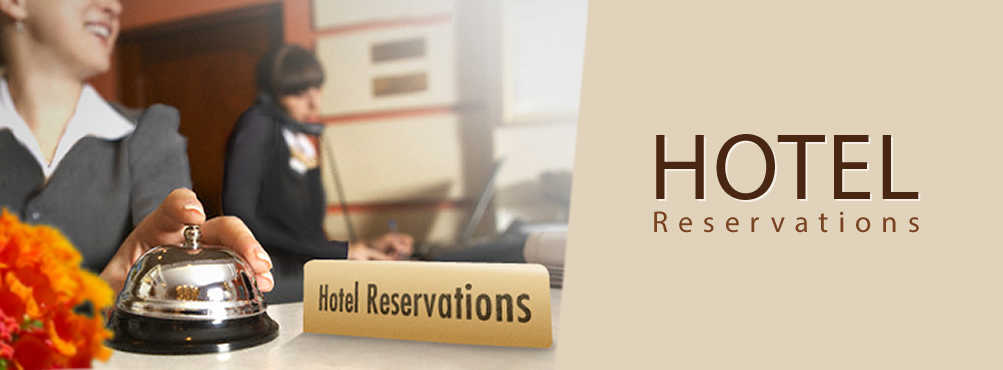

<div style="background-color: #F5F5F5; padding: 10px; border-radius: 10px;">
    <h2 style="color: #1E90FF; font-size: 28px; text-align: center;">Main Problem Statement:</h2>
    <p style="font-size: 20px;">The hotel reservation dataset contains various features related to the booking and stay of guests in a hotel. The objective of this analysis is to understand the patterns in the data and extract insights that can help hotel management to improve their services and revenue.</p>
</div>

<div style="background-color: #F5F5F5; padding: 10px; border-radius: 10px;">
    <h2 style="color: #1E90FF; font-size: 28px; text-align: center;">Report: </h2>
    
<p style="font-size: 20px;">The dataset contains 36,275 entries with 18 features related to the hotel booking. The features include Booking ID, the number of adults and children, the duration of stay in the hotel, type of meal plan, required car parking space, room type reserved, lead time for booking, arrival year, month, and date, market segment type, repeated guest, no of previous cancellations, no of previous bookings not canceled, average price per room, no of special requests, and booking status.</p>
<p style="font-size: 20px;">The initial exploratory data analysis revealed that most of the guests book hotels in the summer season and weekends. The average lead time for booking is around 100 days. The majority of guests prefer the Bed and Breakfast meal plan and the Standard Room type.</p>
<p style="font-size: 20px;">Further analysis showed that the guests who cancel their bookings in the past have a higher chance of canceling the current booking. The guests who have already stayed in the hotel before are more likely to book again. The guests who have special requests, such as extra bed or room, have a higher average price per room.</p>
<p style="font-size: 20px;">Based on these insights, hotel management can take various steps to improve their services and revenue. They can focus on offering more personalized services to the guests who have special requests and provide them with a memorable experience. The hotel can also introduce various packages and offers to attract more guests during the offseason. Additionally, the hotel can target the repeated guests with exclusive deals and discounts to encourage them to book again.</p>
</div>


<div style="background-color: #F5F5F5; padding: 10px; border-radius: 10px;">
<p style="font-size: 20px;">Based on the provided hotel reservation dataset, here are some possible problem statements and questions that can be explored:

<h2 style="color: #1E90FF; font-size: 28px; text-align: center;">Problem Statement:</h2>
<p style="font-size: 20px;">
    <ul>
        <li>Analyzing the factors that influence the booking cancellation rate.</li> 
        <li>Predicting the likelihood of a booking being canceled.</li>
        <li>Identifying the most popular room types, meal plans, and market segments for hotel reservations.</li>
    </ul>
</p>

<h2 style="color: #1E90FF; font-size: 28px; text-align: center;">Questions:</h2>

<ol style="font-size: 20px;">
<li>What is the distribution of booking cancellation rates in the dataset?</li>
<li>What are the most common reasons for cancellation?</li>
<li>Is there a relationship between the number of special requests and the likelihood of cancellation?</li>
<li>What is the average lead time for reservations?</li>
<li>Are there seasonal patterns in hotel bookings?</li>
<li>What is the average price per room for different room types and meal plans?</li>
<li>Is there a correlation between the number of previous bookings and the likelihood of cancellation?</li>
<li>What is the distribution of the length of stay for hotel reservations?</li>
<li>What is the most popular market segment for hotel reservations?</li>
<li>Can we predict the likelihood of cancellation based on the features in the dataset?</li>
</ol>



In [41]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hotel-reservations-classification-dataset/Hotel Reservations.csv
/kaggle/input/images1/199231514-hotel-reception-interior-with-receptionist-people-and-travelers-for-booking-in-flat-cartoon-hand.png


### 1. Importing Libraries and Loading the Dataset

<div style="text-align:center; color:blue; background-color:#f2f2f2;">
    <h1>Exploring Hotel Booking Trends with Machine Learning</h1>
</div>


In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
#Reading dataset
df = pd.read_csv("/kaggle/input/hotel-reservations-classification-dataset/Hotel Reservations.csv")
print("Original shape of Dataframe : " , format(df.shape))
df.head()

Original shape of Dataframe :  (36275, 19)


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [44]:
#last rows of data
df.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


In [45]:
#Checking detail view of dataset and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [46]:
#checking null values
print("Checking any duplicated values in Dataset : " ,format(df.duplicated().sum()))
df.isnull().sum()

Checking any duplicated values in Dataset :  0


Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [47]:
#Checking number of unique values in all columns for further work
df.nunique()

Booking_ID                              36275
no_of_adults                                5
no_of_children                              6
no_of_weekend_nights                        8
no_of_week_nights                          18
type_of_meal_plan                           4
required_car_parking_space                  2
room_type_reserved                          7
lead_time                                 352
arrival_year                                2
arrival_month                              12
arrival_date                               31
market_segment_type                         5
repeated_guest                              2
no_of_previous_cancellations                9
no_of_previous_bookings_not_canceled       59
avg_price_per_room                       3930
no_of_special_requests                      6
booking_status                              2
dtype: int64

In [48]:
df["market_segment_type"].unique()

array(['Offline', 'Online', 'Corporate', 'Aviation', 'Complementary'],
      dtype=object)

In [49]:
df["room_type_reserved"].unique()

array(['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6',
       'Room_Type 5', 'Room_Type 7', 'Room_Type 3'], dtype=object)

In [50]:
df["type_of_meal_plan"].unique()

array(['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3'],
      dtype=object)

In [51]:
#finding unique no of value counts in columns
df["no_of_previous_cancellations"].value_counts() 

0     35937
1       198
2        46
3        43
11       25
5        11
4        10
13        4
6         1
Name: no_of_previous_cancellations, dtype: int64

In [52]:
df["no_of_previous_bookings_not_canceled"].value_counts() 

0     35463
1       228
2       112
3        80
4        65
5        60
6        36
7        24
8        23
10       19
9        19
11       15
12       12
14        9
15        8
16        7
13        7
18        6
20        6
21        6
17        6
19        6
22        6
25        3
27        3
24        3
23        3
44        2
29        2
48        2
28        2
30        2
32        2
31        2
26        2
46        1
55        1
45        1
57        1
53        1
54        1
58        1
41        1
40        1
43        1
35        1
50        1
56        1
33        1
37        1
42        1
51        1
38        1
34        1
39        1
52        1
49        1
47        1
36        1
Name: no_of_previous_bookings_not_canceled, dtype: int64

In [53]:
#dropping few columns
df.drop(["no_of_previous_cancellations","no_of_previous_bookings_not_canceled","arrival_year"],axis = 1, inplace = True)

In [54]:
df["type_of_meal_plan"].unique()

array(['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3'],
      dtype=object)

In [55]:
#Feature Engineering : Mapping types of meal Plans into numerical values

df["type_of_meal_plan"] = df["type_of_meal_plan"].map({"Meal Plan 1": 1, 'Not Selected': 0, 'Meal Plan 2': 2 ,'Meal Plan 3': 3})


In [56]:
df["type_of_meal_plan"]

0        1
1        0
2        1
3        1
4        0
        ..
36270    1
36271    1
36272    1
36273    0
36274    1
Name: type_of_meal_plan, Length: 36275, dtype: int64

In [57]:
df["room_type_reserved"].unique()

array(['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6',
       'Room_Type 5', 'Room_Type 7', 'Room_Type 3'], dtype=object)

In [58]:
#Feature Engineering : Mapping types pf meal Plans into numerical values

df["room_type_reserved"] = df["room_type_reserved"].map({'Room_Type 1': 1, 'Room_Type 2': 2, 'Room_Type 3': 3,'Room_Type 4': 4,'Room_Type 5': 5,'Room_Type 6': 6,'Room_Type 7': 7})

In [59]:
df["room_type_reserved"]

0        1
1        1
2        1
3        1
4        1
        ..
36270    4
36271    1
36272    1
36273    1
36274    1
Name: room_type_reserved, Length: 36275, dtype: int64

In [60]:
df["market_segment_type"].unique()

array(['Offline', 'Online', 'Corporate', 'Aviation', 'Complementary'],
      dtype=object)

In [61]:
#Feature Engineering : Mapping types pf meal Plans into numerical values

df["market_segment_type"] = df["market_segment_type"].map({"Offline": 0, 'Online': 1, 'Corporate': 2 ,'Aviation': 3,'Complementary': 4})

In [62]:
df["market_segment_type"]

0        0
1        1
2        1
3        1
4        1
        ..
36270    1
36271    1
36272    1
36273    1
36274    0
Name: market_segment_type, Length: 36275, dtype: int64

In [63]:
#converting object type to int of these columns

df["type_of_meal_plan"] = df["type_of_meal_plan"].astype(int)
df["room_type_reserved"]= df["room_type_reserved"].astype(int)
df["market_segment_type"]= df["market_segment_type"].astype(int)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Booking_ID                  36275 non-null  object 
 1   no_of_adults                36275 non-null  int64  
 2   no_of_children              36275 non-null  int64  
 3   no_of_weekend_nights        36275 non-null  int64  
 4   no_of_week_nights           36275 non-null  int64  
 5   type_of_meal_plan           36275 non-null  int64  
 6   required_car_parking_space  36275 non-null  int64  
 7   room_type_reserved          36275 non-null  int64  
 8   lead_time                   36275 non-null  int64  
 9   arrival_month               36275 non-null  int64  
 10  arrival_date                36275 non-null  int64  
 11  market_segment_type         36275 non-null  int64  
 12  repeated_guest              36275 non-null  int64  
 13  avg_price_per_room          362

In [65]:
df["booking_status"].unique()

array(['Not_Canceled', 'Canceled'], dtype=object)

In [66]:
# bar plot
#sns.barplot(x='type_of_meal_plan', y='Booking_ID', data=df)

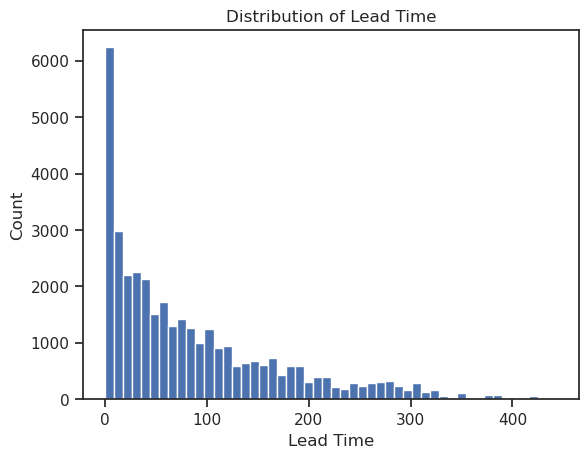

In [67]:
# Histogram
plt.hist(df['lead_time'], bins=50)
plt.xlabel('Lead Time')
plt.ylabel('Count')
plt.title('Distribution of Lead Time')
plt.show()

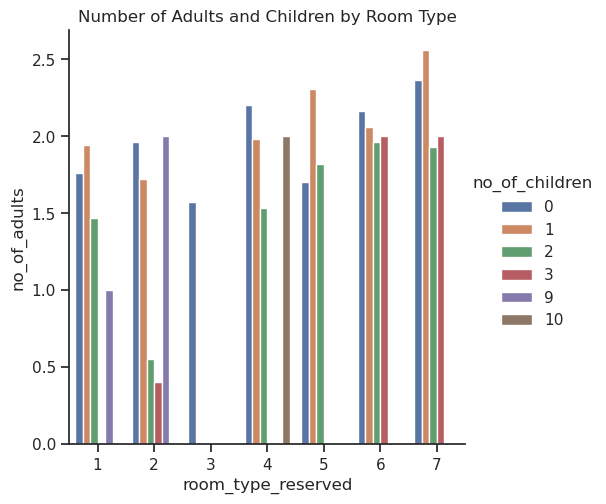

In [68]:
#Stacked bar chart of number of adults and children by room type
sns.catplot(x='room_type_reserved', y='no_of_adults', data=df, kind='bar', hue='no_of_children', errorbar=None)
plt.title('Number of Adults and Children by Room Type')
plt.show()

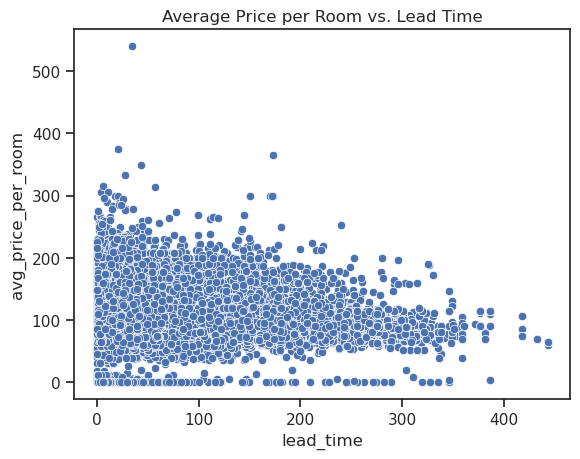

In [69]:
# Scatter plot
sns.scatterplot(x='lead_time', y='avg_price_per_room', data=df)
plt.title('Average Price per Room vs. Lead Time')
plt.show()

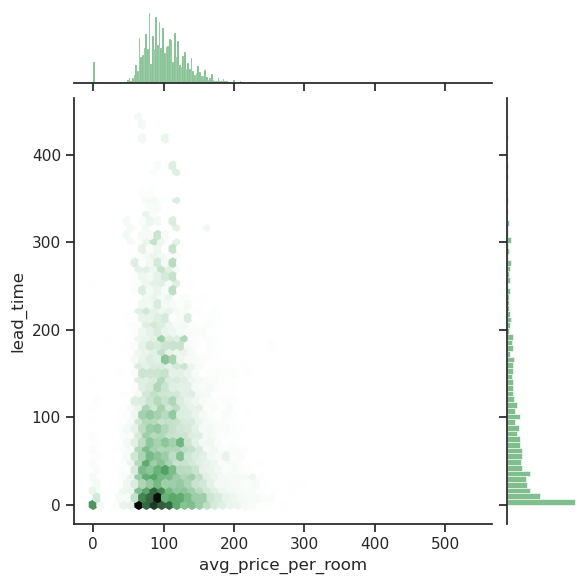

In [70]:
# hexbin plot
sns.set(style="ticks")
sns.jointplot(y="lead_time", x="avg_price_per_room", data=df, kind="hex", color='g')

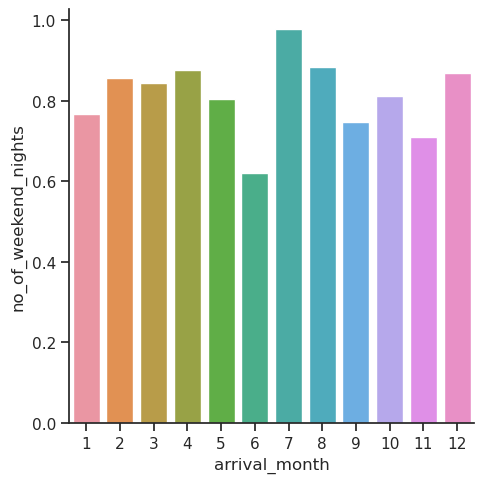

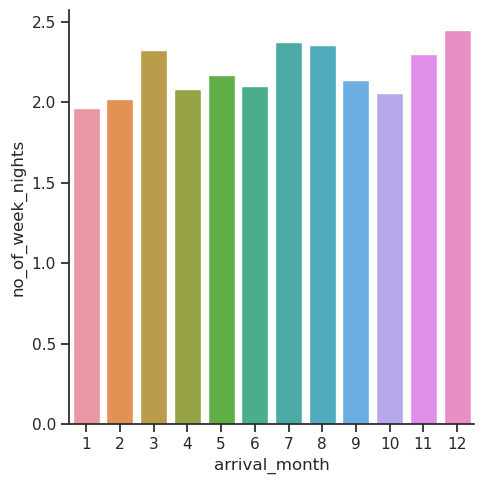

In [71]:
# bar chart of number of weekends and week nights by month
sns.catplot(x='arrival_month', y='no_of_weekend_nights', data=df, kind='bar', errorbar=None)
sns.catplot(x='arrival_month', y='no_of_week_nights', data=df, kind='bar', errorbar=None)
plt.subplots_adjust(hspace=0.5)
plt.show()

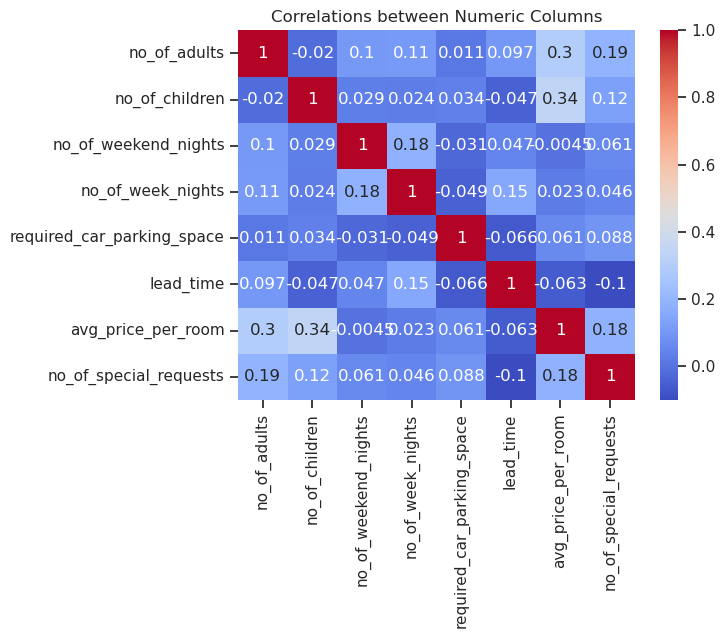

In [72]:
corr = df[['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'avg_price_per_room', 'no_of_special_requests']].corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Correlations between Numeric Columns')
plt.show()

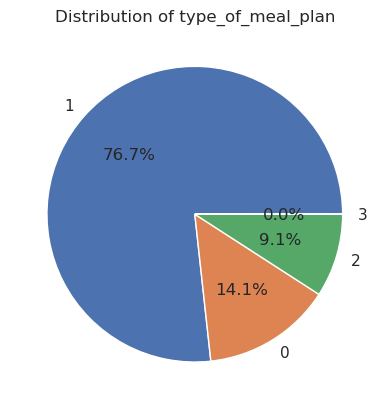

In [73]:
# Extract the column to be used in the pie chart
column_name = 'type_of_meal_plan'
column_values = df[column_name].value_counts()

# Create a pie chart
plt.pie(column_values, labels=column_values.index, autopct='%1.1f%%')
plt.title(f'Distribution of {column_name}')
plt.show()

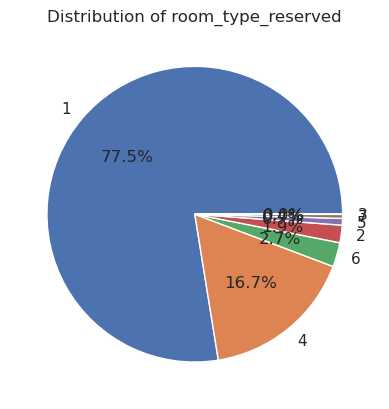

In [74]:
# Extract the column to be used in the pie chart
column_name = 'room_type_reserved'
column_values = df[column_name].value_counts()

# Create a pie chart
plt.pie(column_values, labels=column_values.index, autopct='%1.1f%%')
plt.title(f'Distribution of {column_name}')
plt.show()

In [75]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_month', 'arrival_date',
       'market_segment_type', 'repeated_guest', 'avg_price_per_room',
       'no_of_special_requests', 'booking_status'],
      dtype='object')

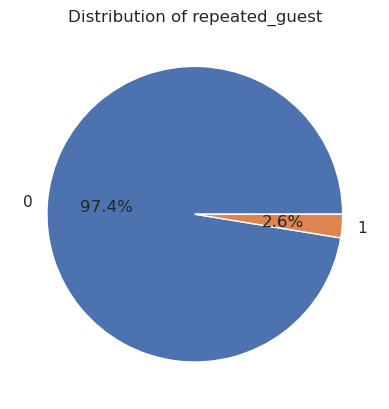

In [76]:
# Extract the column to be used in the pie chart
column_name = 'repeated_guest'
column_values = df[column_name].value_counts()

# Create a pie chart
plt.pie(column_values, labels=column_values.index, autopct='%1.1f%%')
plt.title(f'Distribution of {column_name}')
plt.show()

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Booking_ID                  36275 non-null  object 
 1   no_of_adults                36275 non-null  int64  
 2   no_of_children              36275 non-null  int64  
 3   no_of_weekend_nights        36275 non-null  int64  
 4   no_of_week_nights           36275 non-null  int64  
 5   type_of_meal_plan           36275 non-null  int64  
 6   required_car_parking_space  36275 non-null  int64  
 7   room_type_reserved          36275 non-null  int64  
 8   lead_time                   36275 non-null  int64  
 9   arrival_month               36275 non-null  int64  
 10  arrival_date                36275 non-null  int64  
 11  market_segment_type         36275 non-null  int64  
 12  repeated_guest              36275 non-null  int64  
 13  avg_price_per_room          362

In [82]:
plt.plot(df['arrival_month'], df['number_of_bookings'], marker='o')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.title('Monthly Bookings')
plt.show()


KeyError: 'number_of_bookings'

In [ ]:
grouped = df.groupby('required_car_parking_space').size()
grouped.plot(kind='pie', autopct='%1.2f%%', subplots=True, title='Parking', figsize=(4, 4))

In [ ]:
grouped = df.groupby('no_of_adults').size()
grouped.plot(kind='pie', autopct='%1.2f%%', subplots=True, title='Adults', figsize=(4, 4))

In [ ]:
one_hot_encoded_data = pd.get_dummies(df, columns = ['booking_status'])
one_hot_encoded_data.head()

In [ ]:
df.columns

In [ ]:
#sns.set(style='ticks')
#sns.relplot(x='no_of_weekend_nights', y='no_of_children', hue='type_of_mean_plan', stule='market_segment_type', col='required_car_parking_space')

In [ ]:
grouped = df.groupby('no_of_adults').size()
grouped.plot(kind='pie', autopct='%1.2f%%', subplots=True, title='Adults', figsize=(4, 4))

In [ ]:
from sklearn.preprocessing import OneHotEncoder
#Create an instance of One-hot-encoder
enc=OneHotEncoder()

In [ ]:
enc_data=pd.DataFrame(enc.fit_transform(df[['booking_status']]).toarray())
enc_data.head() 

In [ ]:
#Dividing the data into train and test wherein x as independent variable and y, as in dependent variable
x = df.iloc[: ,: -1]
y = df["booking_status"]



In [ ]:
#Train data (independent Variable)
x.head()

In [ ]:
#Test data(Dependent Variable)
y.head()

In [ ]:
#Importing libraries for best feature selection : SelectKBest Algorithem
from sklearn.feature_selection import SelectKBest

from sklearn.feature_selection import chi2

In [ ]:
#Apply SlectKBest Algorithem
#ordered_rank_features = SelectKBest(score_func =chi2, k=10)
#ordered_feature = ordered_rank_features.fit(x,y)



In [ ]:
#creating 2 columns as Feature and Scores for checking scores of best features available
dfscores = pd.DataFrame(ordered_feature.scores_, columns = ["Score"])
dfcolumns = pd.DataFrame(x.columns)

In [ ]:
#Merging both the columns by (col)
features_rank = pd.concat([dfcolumns,dfscores],axis = 1)

In [ ]:
#showing Ranking of the columns with best scores
features_rank.columns = ["Features", "Score"]
features_rank

In [ ]:
#ranking of features in Descending order
features_rank.nlargest(10,"Score")

In [ ]:
#Feature Importance
#This technique gives you a score for each feature of your data,the higher the score mor relevant it is


In [ ]:
#importing model ExtraTreesClassifier for fitting on x, y
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(x,y)

In [ ]:
print(model.feature_importances_)

In [ ]:
#Ranking shown by graph of best featires selected by model
ranked_features=pd.Series(model.feature_importances_,index=x.columns)
ranked_features.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
#checking correlation of features among themselves
df.corr()

In [ ]:
#importing seaborn Library for plotting heat map on correlation
import seaborn as sns
corr=df.iloc[:,:-1].corr()
top_features=corr.index
plt.figure(figsize=(20,20))
sns.heatmap(df[top_features].corr(),annot=True)

In [ ]:
#Removing the correlated features 
threshold = 0.5

In [ ]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
correlation(df.iloc[:,:-1],threshold)

In [ ]:
#this library help us to find out highly correlated features
from sklearn.feature_selection import mutual_info_classif

In [ ]:
#Mutual information (MI) [1]_ between two random variables is a non-negative
#value, which measures the dependency between the variables. It is equal
#to zero if and only if two random variables are independent, and higher
#values mean higher dependency.

mutual_info=mutual_info_classif(x,y)

In [ ]:
mutual_data=pd.Series(mutual_info,index=x.columns)
mutual_data.sort_values(ascending=False)
